<a name="cell-MCMC-TOC"></a>

3. [High Dimensional Integration](#cell-integration-dimension)
  1. [Dimension Agnostic Integration](#cell-integration-dimension-scaling)
      1. [Sampling High Dimensional](#cell-MCint-highdimensionalX) $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x})$
      2. [The Markov Property and Markov Chains](#cell-MCint-MC)
      3. [Markov Chain Monte Carlo (MCMC)](#cell-MCint-MCMC)
      4. [Slice Sampling](#cell-MCint-slice)
      5. [Sampling Marginal Distributions](#cell-MCint-sampling-marginals)

  2. [Dimension Agnostic Integration v2.0](#cell-MCint-sampling)
      1. [History: Gibbs Sampling](#cell-MCint-gibbs)
      2. [Demo: Gibbs Sampling](#cell-MCint-gibbs2)
      3. [More Sampling Efficiency: Rao-Blackwellization](#cell-MCint-RaoB)
      4. [Metropolis-Hastings](#cell-MCint-sampling-MCMC-MH)

  3. [Hamiltonian Dynamics](#cell-MCint-Hamiltonian-Dynamics)
      1. [Energy Contours](#cell-MCint-sampling-MCMC-HMC-contour)
      2. [Energy Perturbation Proposals](#cell-MCint-sampling-MCMC-HMC-energy-proposals)
      3. [Hamiltonian Monte Carlo (HMC)](#cell-MCint-sampling-MCMC-HMC)
      4. [HMC and High Dimensional Sampling](#cell-MCint-sampling-MCMC-HMC2)
      
<!--       
      3. [Putting it All Together: Metropolis-Hastings Proposals](#cell-MCint-sampling-MCMC-HMC-MH)
5. [Marginal/Posterior Distributions](#cell-MCint-sampling-MCMC-HMC3)

-->

<a name="cell-integration-dimension"></a>

# 3. High Dimensional Integration ([Return to TOC](#cell-MCMC-TOC))

---

- Numerical ***integral approximation*** like `scipy.integrate.quad`<br>is not ***integration estimation*** 
    - ***Estimation*** is a statistical technique while ***approximation*** is...<br>truncation or other alteration of a mathematical formulation providing a simpler, but "arbitrarily close" computation  
      > ***Floating point numbers*** are an ***approximation*** and see `STA410_W24_Week2_Extra_IntegralApproximation.ipynb`

<span>
    
For scalar valued $\overline{g(X)}$ <font style='color:blue;'>***integration estimator standard error*** is $O(n^{-1/2})$</font> 

$$E[g(X)] = \int \! g(x) p_X(x) dx \quad \text{ regardless of the dimension of } \quad X \sim p_X(x)$$

<font style='color:red;'>***Integral approximations*** in dimension $d$</font> are based on function evaluation summation over an $n^d$ grid where<br>(assuming computational feasibility) a one dimensional <font style='color:red;'>error $\epsilon$ scales as $O\left(\frac{1}{\sqrt[d]{\frac{1}{\epsilon}}}\right)$</font> which is something like <font style='color:red;'>$O\left(`n`^{-1/d}\right)$</font></span>

<a name="cell-integration-dimension-scaling"></a>

## 3.A Dimension Agnostic Integration ([Return to TOC](#cell-MCMC-TOC))

---

The power of ***integral estimation*** lies in its (theoretical) bypass of a "curse of dimensionality" 

$$E[g(\mathbf{X})] = \int\int\cdots\int \! g(\mathbf{x}) p_\mathbf{X}(\mathbf{x}) dx_1dx_2\cdots dx_n$$

is dimension agnostic while ***integration approximation*** accuracy degrades with dimension $d$ 


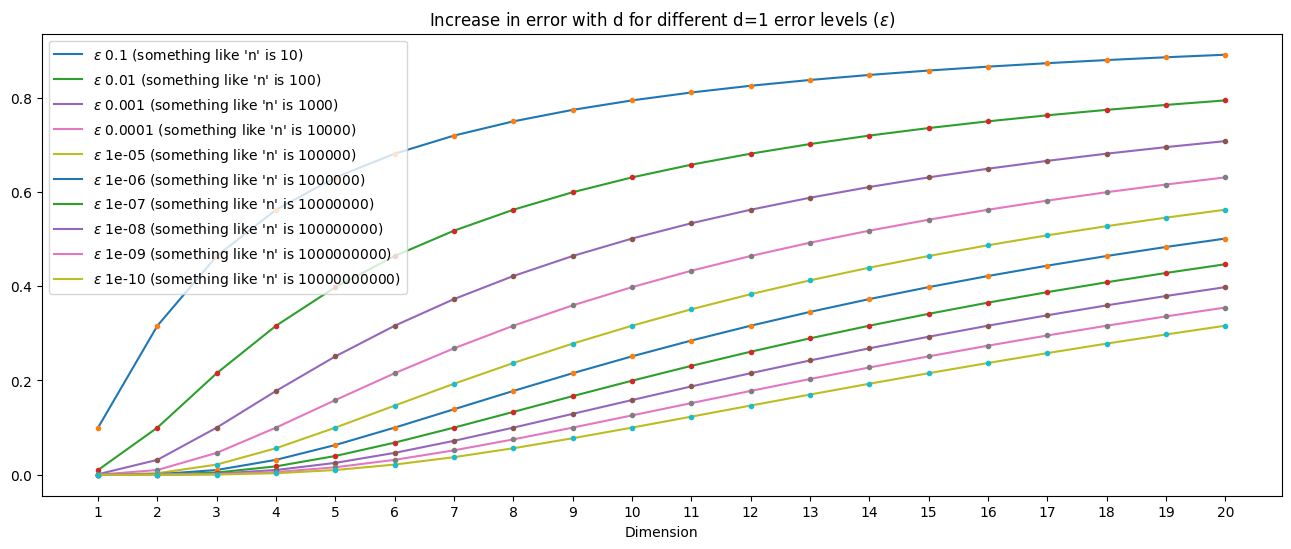

In [10]:
import matplotlib.pyplot as plt; import numpy as np; plt.figure(figsize=(16,6))
for ep_inv in np.logspace(1,10,10):
    plt.plot(ep_inv**(-1/np.arange(1,21)), label="$\\epsilon$ "+str(1/ep_inv)+ " (something like 'n' is "+str(int(ep_inv))+")"); plt.plot(ep_inv**(-1/np.arange(1,21)), '.')
plt.legend(); plt.xlabel("Dimension"); plt.xticks(np.arange(0,20, dtype=int), np.arange(1,21, dtype=int)), plt.title("Increase in error with d for different d=1 error levels ($\\epsilon$)");


<a name="cell-MCint-highdimensionalX"></a>

## 3.A.a Sampling High Dimensional $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x})$ ([Return to TOC](#cell-MCMC-TOC))

---

$$E[g(\mathbf{X})] = \int\int\cdots\int \! g(\mathbf{x}) p_\mathbf{X}(\mathbf{x}) dx_1dx_2\cdots dx_n$$

But can we sample from high dimensional $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x}) \quad ?$

<span>

- Sure, use the ***chain rule***

\begin{align*}
p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)}) = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)})
\end{align*}


1. $\text{Sample }p_{X^{(0)}}(x^{(0)})$

2. $\text{Sample }p_{X^{(1)}|X^{(0)}}(x^{(1)}|x^{(0)})$

3. $\text{Sample }p_{X^{(2)}|X^{(1)},X^{(0)}}(x^{(2)}|x^{(1)},x^{(0)})$

4. $\cdots \text{ and so on } \cdots$

    
### But this is pretty complicated...
<br>
</span>





<a name="cell-MCint-MC"></a>

## 3.A.b The Markov Property and Markov Chains ([Return to TOC](#cell-MCMC-TOC))

---

<span style="color:gray">

$$E[g(\mathbf{X})] = \int\int\cdots\int \! g(\mathbf{x}) p_\mathbf{X}(\mathbf{x}) dx_1dx_2\cdots dx_n$$

But can we sample from high dimensional $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x}) \quad ?$
    
</span>
    
    
- ***Markov chains*** are sequential dependency structure satisfying the ***Markov property***

$$p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)}) = p_{X^{(t)}|X^{(t-1)}}(X^{(t)} | x^{(t-1)})\require{cancel}$$

$X^{(t)}$ and $X^{(t-2)}$ are ***conditionally independent*** given $X^{(t-1)}$

$$\underset{\newcommand\ci{\perp\!\!\!\perp}\text{more generally } \quad X^{(t)} \cancel \ci  X^{(t')} \quad \text{ but } \quad  X^{(t)} \ci  X^{(t')} | X^{(t^*)} \quad \text{ for } t < t^* < t'}{\newcommand\ci{\perp\!\!\!\perp} x^{(t)} \cancel \ci  X^{(t-2)} \quad \text{ but } \quad  X^{(t)} \ci  X^{(t-2)} | X^{(t-1)}}$$


\begin{align*}
\text{but then } p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)}) = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)}) \\
\text{simpifying the} \textbf{ chain rule}\text{...} \quad\quad = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}}(x^{(t)} | x^{(t-1)}) 
\end{align*}


<a name="cell-MCint-MCMC"></a>

## 3.A.c Markov Chain Monte Carlo (MCMC) ([Return to TOC](#cell-MCMC-TOC))

---

In a ***Markov chain*** sequential samples from $p_{X^{(t)}|X^{(t-1)}}(x^{(t)} | x^{(t-1)})$ sample the joint distribution of $p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)})$ as a result of the ***Markov property*** simplification of the ***chain rule***

\begin{align*}
p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)}) = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)}) \\
\quad\quad = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}}(x^{(t)} | x^{(t-1)}) 
\end{align*}

Each $x^{(t)}$ is therefore a representative sample of its marginal distribution $p_{X^{(t)}}(x^{(t)})$ even though 

1. $x^{(t)}$ was instead sampled from $p_{X^{(t)}|X^{(t-1)}}(x^{(t)}|x^{(t-1)})$
2. resulting in the dependent collection of samples $(x^{(T)}, \cdots, x^{(0)})$

### For identical marginal distributions for each $x^{(t)} \sim p_{X^{(t)}}(x^{(t)}) = p_X(x^{(t)}) \text{ for all } t$<br> then we have $(x^{(T)}, \cdots, x^{(0)})$ is a correlated sample from $p_X(x)$ 






## 3.A.c Markov Chain Monte Carlo (MCMC)

---


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]


Sampling 4 chains for 0 tune and 500 draw iterations (0 + 2_000 draws total) took 0 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


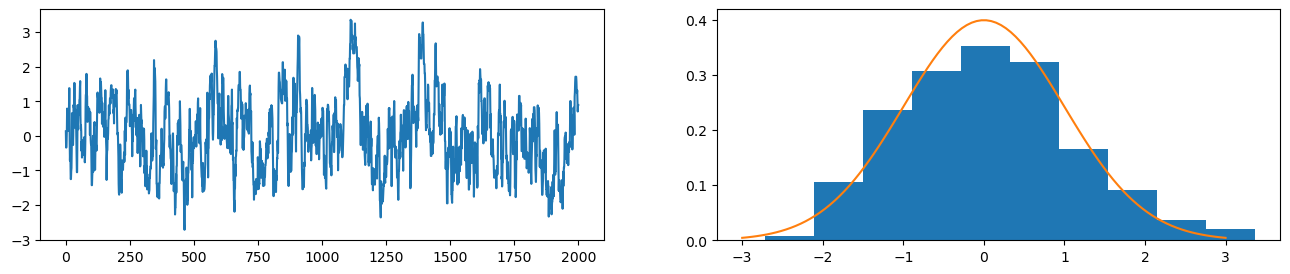

In [5]:
import pymc as pm; import matplotlib.pyplot as plt; import numpy as np; from scipy import stats 
with pm.Model() as model: # A demonstration of depdendent samples which over time nonetheless represent a marginal distribution
    x = pm.Normal("x", mu=0, sigma=1)
    dependent_samples = pm.sample(500, tune=False, return_inferencedata=False, step=pm.Metropolis(vars=[x], S=np.array([0.5])))
fig,ax = plt.subplots(1,2, figsize=(16,3)); ax[0].plot(dependent_samples['x']); ax[1].hist(dependent_samples['x'], density=True); ax[1].plot(np.linspace(-3,3,100), stats.norm.pdf(np.linspace(-3,3,100)));

***Markov chain Monte Carlo (MCMC)*** is when there are enough dependent samples $x^{(t)}$ from a ***Markov Chain***<br>to sufficiently represent samples from $p_{X}$ (to use them for ***MCMC integration***)

> <font style='color:green'>If $T$ is sufficiently large then the bias in the sample caused by the dependence in $(x^{(T)}, \cdots, x^{(0)})$ will "wash out" and won't matter in the context all the samples together</font>


<a name="cell-MCint-slice"></a>

## 3.A.d A First MCMC example: *Slice Sampling* ([Return to TOC](#cell-MCMC-TOC))

$$p(x^{(1)}|y^{(0)}) \;\rightarrow\; p(y^{(1)}|x^{(1)}) \;\rightarrow\; p(x^{(2)}|y^{(1)}) \;\rightarrow\;p(y^{(2)}|x^{(2)}) \;\rightarrow\; p(x^{(3)}|y^{(2)}) \;\rightarrow\;p(y^{(3)}|x^{(3)}) \;\rightarrow\; \cdots$$

Alternatingly sample $\;\;$ (A) $x_t \sim \text{Unif}( \{x: p_X(x) \geq y_{t-1} \})$  $\;\;$ and $\;\;$ 
(B) $y_t \sim \text{Unif}(0,p_X(x_{t}))$ 

Traverses a (dependent) sequential path "beneath" the ***target density*** (without going "outside" like ***rejection sampling*** might)

|<img src='https://barumpark.com/assets/img/slicesamps-1.png' style='width:1500px'>|
|-|
| |

|![](https://www.researchgate.net/profile/Michael-Jordan-3/publication/227276601/figure/fig14/AS:668556802928655@1536407771607/Slice-sampling-given-a-previous-sample-we-sample-a-uniform-variable-u-i-1-between-0.png)|![](https://www.researchgate.net/profile/Benyamin-Ghojogh/publication/345215567/figure/fig6/AS:953627036381186@1604373811408/The-steps-in-slice-sampling-algorithm.ppm)|
|-|-|
| | |



<a name="cell-MCint-slice"></a>

## 3.A.d A First MCMC example: *Slice Sampling* ([Return to TOC](#cell-MCMC-TOC))

$$p(x^{(1)}|y^{(0)}) \;\rightarrow\; p(y^{(1)}|x^{(1)}) \;\rightarrow\; p(x^{(2)}|y^{(1)}) \;\rightarrow\;p(y^{(2)}|x^{(2)}) \;\rightarrow\; p(x^{(3)}|y^{(2)}) \;\rightarrow\;p(y^{(3)}|x^{(3)}) \;\rightarrow\; \cdots$$

Alternatingly sample $\;\;$ (A) $x_t \sim \text{Unif}( \{x: p_X(x) \geq y_{t-1} \})$  $\;\;$ and $\;\;$ 
(B) $y_t \sim \text{Unif}(0,p_X(x_{t}))$ 

Traverses a (dependent) sequential path "beneath" the ***target density*** (without going "outside" like ***rejection sampling*** might)

|![](https://www.researchgate.net/profile/Michael-Jordan-3/publication/227276601/figure/fig14/AS:668556802928655@1536407771607/Slice-sampling-given-a-previous-sample-we-sample-a-uniform-variable-u-i-1-between-0.png)|![](https://www.researchgate.net/profile/Benyamin-Ghojogh/publication/345215567/figure/fig6/AS:953627036381186@1604373811408/The-steps-in-slice-sampling-algorithm.ppm)|
|-|-|
| | |


|<img src='https://barumpark.com/assets/img/slicesamps-1.png' style='width:1500px'>|
|-|
| |




## 3.B.a Slice Sampling

---



For (B) produce a bounding interval around $x_{t-1}$ and sample $x_t$ from it uniformly by

1. rejecting $x_t$, adjusting the bounding interval, and trying again if $p_X(x_t) < y_{t}$
2. keeping $x_t$ if $y_{t} \leq p_X(x_t)$ (so ***slice sampling*** uses a ***rejection sampling*** substep)




***Slice sampling*** is ***MCMC*** with 

$$p_{X_t,Y_t|X_{t-1}}(x_t,y_t|x_{t-1}) = p_{X_{t}|Y_t}(x_t|y_t) p_{Y_t|X_{t-1}}(y_t|x_{t-1})$$

for $\;p_{Y_t|X_{t-1}}(y_t|x_{t-1}) = \text{Unif}(0,p_X(x_{t-1}))\;$ and $\;p_{X_{t}|Y_t}(x_t|y_t) = \text{Unif}( \{x: y_{t} \leq p_X(x)\})$ 



<a name="cell-MCint-sampling-marginals"></a>

## 3.A.e Sampling Marginal Distributions ([Return to TOC](#cell-MCMC-TOC))

***Slice sampling*** produces a ***Markov chain*** $\big((x_T, y_T)), (x_{T-1}, y_{T-1}), \cdots, (x_1, y_1), (x_0, y_0)\big)$<br>from the joint distribiution $p_{(X_t,Y_t)}(x_t,y_t)$; or, this could be rewritten as two ***Markov chains***

$$(x_T, x_{T-1}, \cdots, x_1, x_0) \quad \text{ and } \quad (y_T, y_{T-1}, \cdots, y_1, y_0)$$
<br>

***Slice sampling*** then uses the single chain $(x_T, x_{T-1}, \cdots, x_1, x_0)$ as **MCMC** samples from  $p_{X_t}(x_t)$ 
> *since this is what it is if $(x_T, y_T)$ is an **MCMC** sample from the **joint distribution** $p_{(X_t,Y_t)}(x_t,y_t)$*

<br>

This performs the action of **marginalizing** (integrating out) the auxiliary variable $Y_t$

$$p_{X_t}(x_t) = \int p_{(X_t,Y_t)}(x_t,y_t) dY_t$$

> So once again, integration is readily facilitated by **MCMC**...

<font style='color:red'>But we seem to have lost our high dimensional samples in all of this... </font><font style='color:blue'>Wasn't that the point of this to start with?</font> Hold that thought...

<a name="cell-MCint-sampling"></a>

# 3.B Dimension Agnostic Integration v2.0 ([Return to TOC](#cell-MCMC-TOC))

---

We started out trying to get ***high dimensional integration***

$$E[g(\mathbf{X})] = \int\int\cdots\int \! g(\mathbf{x}) p_\mathbf{X}(\mathbf{x}) dx_1dx_2\cdots dx_n$$

but really seem to have just ended up back at the beginning with simple ***univariate integration***

$$E[g(\mathbf{X})] = \int \! g(\mathbf{x}) p_{X}({x}) dx$$

<br>

<span style='color:black'>
Let's try again but this time we'll change our notation to try to show that we really mean it...
<br><br>
    
$$E[g(\mathbf{\theta})] = \int\int\cdots\int \! g(\mathbf{\theta}) p(\mathbf{\theta}) d\theta_1d\theta_2\cdots d\theta_n$$
</span>


<a name="cell-MCint-gibbs"></a>

## 3.B.a History: Gibbs Sampling ([Return to TOC](#cell-MCMC-TOC))

---

The process of alternatingly sampling between $p_{(X_t|Y_t)}(x_t|y_t)$ and $p_{(Y_t|X_t)}(y_t|x_t)$ undertaken by ***slice sampling*** can be generalized into the procedure known as ***Gibbs sampling***... producing samples from $p(\theta_1, \cdots, \theta_q|x)$ by instead cyclically sampling from the 


|*Full Conditionals*| |
|-|-|
| \begin{align*}1.\;&\;{} p(\theta_1^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_2^{(t-1)}, x)\\ 2.\; &\;{} p(\theta_2^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_3^{(t-1)}, \theta_1^{(t)}, x)\\ 3.\;&\;{} p(\theta_3^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_4^{(t-1)}, \theta_2^{(t)}, \theta_1^{(t)}, x)\\4. \;&\;{} p(\theta_4^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_5^{(t-1)}, \theta_3^{(t)}, \theta_2^{(t)},\theta_1^{(t)}, x)\\\vdots\\ q. \;&\;{} p(\theta_q^{(t)}|\theta_{q-1}^{(t)}, \cdots, \theta_1^{(t)}, x) \quad\text{[ return to 1.]}\end{align*} |***Gibbs sampling*** doesn't follow the ***chain rule*** decomposing of the ***joint distribution***<br>but it can still nonetheless be shown to produce samples from the ***joint distribution***<br><br>$$p(\theta_q, \cdots, \theta_1|x)$$<br>This process generates $\theta^{(t)}$ on the basis of $\theta^{(t-1)}$ so...<br>***Gibbs sampling*** produces a ***Markov chain*** with respect to the (multivariate) parameter vector $\theta$|


***Gibbs sampling*** was once a dominant staple of Bayesian model fitting methodology. However, the sequential dependence in the parameters induced by ***Gibbs sampling*** quickly suffers a prohibitive "curse of dimensionality" that limits its application to low dimensional parameter spaces. The advent of ***Hamiltonian Monte Carlo*** (***HMC***) which avoids inducing a sequential dependence in parameter sampling has thus relegated the use of ***Gibbs sampling*** to the domain of discrete random variable contexts (often in conjuction with ***Metropolis-Hastings***) where ***HMC*** (which only addresses continuous random variables) cannot be applied.

Sampling ***full conditionals*** [or even $p_{X^{(t)}|X^{(t-1)}}(x^{(t)}|x^{(t-1)})$ for that matter] could be done using **Adaptive Squeezed Rejection Sampling** method of `STA410_W24_Week2_Demo_AdaptiveRejectionSampling.ipynb`. The first-generation probabilistic programming tool **WinBugs** provided **MCMC** sampling using just a likelihood and a prior specification (and no user supplied derivations) on the basis of **Adaptive Squeezed Rejection Sampling** within a ***Gibbs sampling*** framework... 


<a name="cell-MCint-gibbs2"></a>

## 3.B.b Demo: Gibbs Sampling ([Return to TOC](#cell-MCMC-TOC))

---

The canonical example of ***Gibbs sampling*** is the ***normal-gamma*** model

$$\begin{align*}
p\left(x|\mu,\tau=\frac{1}{\sigma^2}\right) = {} & \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\mu)^2}\\
p(\mu,\tau) \propto {} & 1 \\
p(\mu,\tau| x) \propto p(\mu,\tau, x) \propto {} &  \tau^{n/2} e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i-\mu)^2} \\
p(\tau|\mu, x) = {} & \text{Gamma}\left(\alpha = \frac{n}{2}+1, \beta= \frac{1}{2} \sum_{i=1}^n (x_i-\mu)^2 \right)\\
p(\mu| \tau, x)  \propto {} & e^{-\frac{\tau}{2} \sum_{i=1}^n \mu^2 - 2\mu x_i} =  e^{-\frac{\tau}{2} \left(n\mu^2 - 2\mu \sum_{i=1}^n x_i\right)} = e^{-\frac{\tau n }{2} \left(\mu^2 - 2\mu \bar x\right)}\\
  \propto {} & e^{-\frac{n \tau}{2} (\mu - \bar x)^2} \\
p(\mu| \sigma^2 = \tau^{-1}, x) = {} & N\left(E[\mu] = \bar x, Var(\mu) = \frac{\sigma^2}{n}\right)
\end{align*}$$

and see [here](https://bookdown.org/rdpeng/advstatcomp/gibbs-sampler.html) for the fully ***conjugate prior*** specification.



## 3.B.b Demo: Gibbs Sampling

---

In [6]:
from scipy import stats; import numpy as np; import matplotlib.pyplot as plt
n = 30; x = stats.norm.rvs(size=n); C,G = 2,100 # chains, Gibbs samples
mu,tau = np.zeros([C,G]),np.zeros([C,G]); mu[:,0] = 1000 # initialization
for c in range(C):
    for g in range(1,G):
        tau[c,g] = stats.gamma(a=n/2+1, scale=2/((x-mu[c,g-1])**2).sum()).rvs(size=1)[0]
        mu[c,g] = stats.norm(x.mean(), scale=1/np.sqrt(tau[c,g]*n)).rvs(size=1)[0]

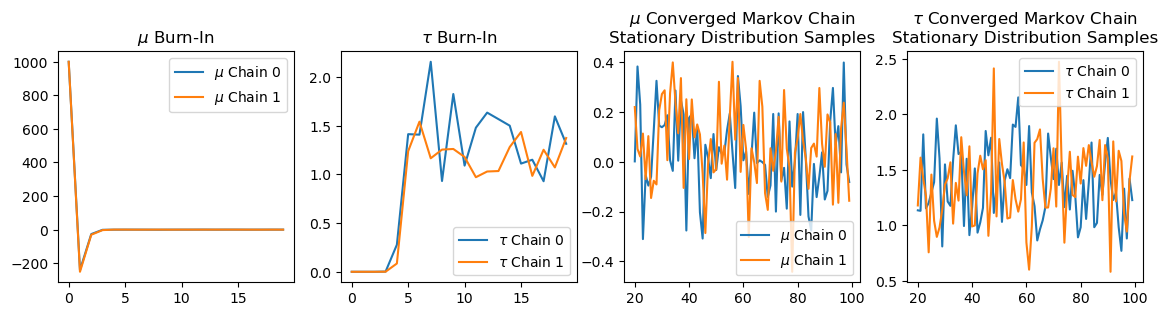

In [21]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\mu$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\mu$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
for c in range(C):
  ax[0].plot(mu[c,:burn], label="$\\mu$ Chain "+str(c)); ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c)); ax[2].plot(np.arange(burn,G,dtype=int), mu[c,burn:], label="$\\mu$ Chain "+str(c)); ax[3].plot(np.arange(burn,G,dtype=int), tau[c,burn:], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

<a name="cell-MCint-RaoB"></a>

## 3.B.c More Sampling Efficiency: Rao-Blackwellization ([Return to TOC](#cell-MCMC-TOC))

---


|*Rao-Blackwellization* leverages| |
|:-:|-| 
| <br>$$E[g(x)]=E_z[E_{x|z}[g(x)|z]]$$ <br>but the latter is a<br>lower variance estimator<br><br>$$ \text{Var}_{x}[g(x)] \geq \text{Var}_z[E_{x|z}[g(x)|z]] $$<br>| ***Rao-Blackwellization*** is encountered in Bayesian context where [expectations of conditional distributions](https://arxiv.org/pdf/2101.01011.pdf), such as those automatically produced by ***Gibbs sampling***, provide lower variance ***integral estimates*** that samples from marginal distributions |

$$\begin{align*}
\text{Var}_{x}[g(x)] = {} & E_{x}\left[g(x)^2\right] - E_{x}\left[g(x)\right]^2\\
= {} & \overbrace{E_{z}\left[ E_{x|z}\left[ g(x)^2 | z\right]\right]}^{\int \int g(x)^2 \frac{p(x,z)}{p(z)}p(z) dxdz} - \overbrace{E_{z}\left[E_{x|z}[g(x)|z]\right]^2}^{\left(\int \int g(x) \frac{p(x,z)}{p(z)}p(z)dxdz \right)^2}\\
= {} & E_{z}\left[ E_{x|z}\left[ g(x)^2 | z\right]\right] - \left( E_{z}\left[E_{x|z}[g(x)|z]^2\right] - \text{Var}_{z}\left[E_{x|z}[g(x)|z]\right] \right) \\
= {} & E_{z}\left[ E_{x|z}\left[ g(x)^2 | z\right] -  E_{x|z}[g(x)|z]^2\right] + \text{Var}_{z}\left[E_{x|z}[g(x)|z]\right]  \\
= {} &  E_z[\text{Var}_{x|z}([g(x)|z])] + \text{Var}_z(E_{x|z}[g(x)|z]) \\
\geq {} &  \text{Var}_z(E_{x|z}[g(x)|z]) 
\end{align*}$$



<a name="cell-MCint-sampling-MCMC-MH"></a>

## 3.B.d Metropolis-Hastings (MH) ([Return to TOC](#cell-MCMC-TOC))

---

The (***Markov***) ***proposal distribution*** 

$$\tilde \theta^{(t)} \sim \tilde p(\tilde \theta^{(t)}|\theta^{(t-1)})$$

accepted as  

$$\theta^{(t)} = \left\{\begin{array}{ll}
\tilde \theta^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde \theta^{(t)}|x)}{p(\theta^{(t-1)}|x)}\frac{\tilde p(\theta^{(t-1)}|\tilde \theta^{(t)})}{\tilde p(\tilde \theta^{(t)}|\theta^{(t-1)})}\right) \quad \color{gray}{\text{Is normalizing constant needed for $p$?}}\\
\theta^{(t-1)} & \text{otherwise}
\end{array}\right.$$

will create a ***Markov chain*** with ***stationary distribution*** $p(\theta|x)$. 


|For ***symmetric proposal distribution*** | the ***acceptance probability*** reduces to |
|-|-|
|$$\frac{\tilde p(\theta^{(t-1)}|\tilde \theta^{(t)})}{\tilde p(\tilde \theta^{(t)}|\theta^{(t-1)})} = 1$$|$$\min\left(1,\frac{p(\tilde \theta^{(t)}|x)}{p(\theta^{(t-1)}|x)}\right)$$|


## 3.B.d Metropolis-Hastings (MH)

---


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]


Sampling 4 chains for 0 tune and 500 draw iterations (0 + 2_000 draws total) took 0 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


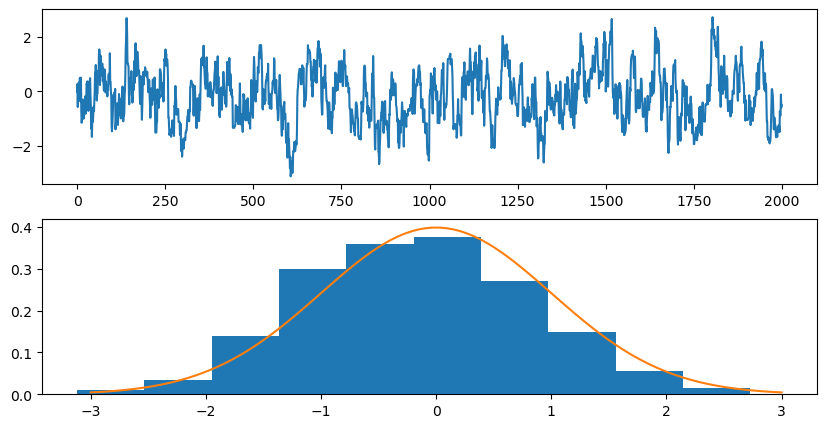

In [23]:
import pymc as pm; import matplotlib.pyplot as plt; import numpy as np; from scipy import stats
# A demonstration of depdendent samples which over time nonetheless represent a marginal distribution
with pm.Model() as model:
    x = pm.Normal("x", mu=0, sigma=1)
    dependent_samples = pm.sample(500, tune=False, return_inferencedata=False, 
                                  step=pm.Metropolis(vars=[x], S=np.array([0.5])))
fig,ax = plt.subplots(2,1, figsize=(10,5)); ax[0].plot(dependent_samples['x']); ax[1].hist(dependent_samples['x'], density=True); ax[1].plot(np.linspace(-3,3,100), stats.norm.pdf(np.linspace(-3,3,100)));

## 3.B.d Metropolis-Hastings (MH)

---

In [29]:
import matplotlib.pyplot as plt; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Here's an example of MH with a non-symmetric proposal
proposal_dist = stats.gamma(a=2, loc=-2); target_dist = stats.norm(); T = 1000; MH_samples = np.zeros(T)
for t in range(1,T):
    current = MH_samples[t-1]; proposal = current + proposal_dist.rvs(size=1)
    acceptance_probability = target_dist.pdf(proposal)/target_dist.pdf(current)*\
                             proposal_dist.pdf(current-proposal)/proposal_dist.pdf(proposal-current)
    if stats.uniform().rvs(size=1) < acceptance_probability:
        MH_samples[t] = proposal
    else:
        MH_samples[t] = MH_samples[t-1]

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_69926/409531311.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MH_samples[t] = proposal


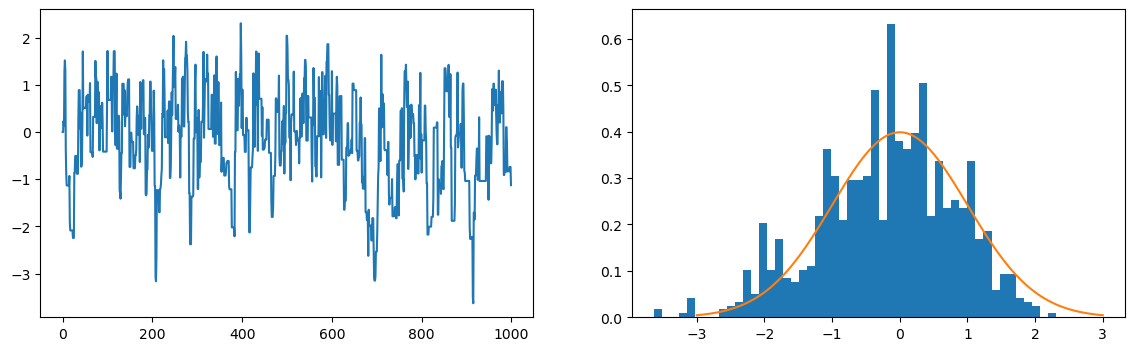

In [27]:
fig,ax = plt.subplots(1,2, figsize=(14,4)); ax[0].plot(MH_samples); ax[1].hist(MH_samples, density=True, bins=50); x = np.linspace(-3,3,100); ax[1].plot(x, target_dist.pdf(x))

<a name="cell-MCint-Hamiltonian-Dynamics"></a>

## 3.C Hamiltonian Dynamics ([Return to TOC](#cell-MCMC-TOC))

---

A ***log joint probability distribution*** with parameters $\theta$  of interest and ***auxilliary variables*** $v$ with $\dim(v)=\dim(\theta)$ 

$$\Large
\begin{align*}
H(\theta, z) = {} & U(\theta) + K(v|\theta) \\
\text{often simplified to } \Longrightarrow \quad = {} & U(\theta) + K(v) \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad
\end{align*}$$

determines ***Hamiltonian dynamics*** of ***potential*** $U(\theta)$ and ***kinetic*** $K(v)$ ***energy*** (***momentum*** or ***velocity***)<br>which obey the ***law of conservation of energy*** defined by the differential equations 

$$\Large \begin{align*} 
\frac{d\theta}{dt} & = {} \frac{dH}{dv}(v(t)) & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta}(\theta(t))\\
\end{align*}$$

Specifically, $\theta$ and $v$ ***energy*** parameters of a ***Hamiltonian dynamics system*** are evolved by differential equations across time $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ so the log joint density (***energy***) stays constant $p(\theta_0, v_0|x) = p(\theta_t, v_t|x)$ 

> The ***potential energy*** $U(\theta)$ and ***kinetic*** $K(v)$ ***energy*** remain inversely synchronized over time so that the total ***energy*** overall always remains constant



<a name="cell-MCint-sampling-MCMC-HMC-contour"></a>

## 3.C.a Energy Contours ([Return to TOC](#cell-MCMC-TOC))

---

- The continuous differential equation evolution can be modeled using small time steps<br>incrementally updating $\theta_t$ and $v_t$ with discrete approximated to $\frac{d\theta}{dt}$ and $\frac{dv}{dt}$
- ***Uniformly randomly*** sampling a number of discrete approximation steps and evolving up to $\theta_t$ and $v_t$ provides a ***Metropolis-Hastings*** proposal distribution $\tilde p( \theta_t,  v_t|\theta_0,v_0)$ with an ***aceptance probability*** of $1$

| | |
|-|-|
| $$\require{cancel}\min\left(1,\cancel{\frac{p( \theta_t,  v_t|x)}{p(\theta_0,v_0|x)}}^1\cancel{\frac{ \tilde p(\theta_0,v_0| \theta_t,  v_t)}{\tilde p( \theta_t,  v_t|\theta_0,v_0)}}^1\right)$$ | assuming proposals $ \theta_t$ and $ v_t$ are on the same ***level-set contour*** of the ***log joint probability distribution*** as initial values $\theta_0$ and $v_0$ and the differential equation evolution is reversible | 

![](https://i.stack.imgur.com/mJoHA.png)

- Figures from [introductory HMC paper](https://arxiv.org/abs/1701.02434) discussed on [stack exchange](https://stats.stackexchange.com/questions/324346/hamiltonian-monte-carlo-how-to-make-sense-of-the-metropolis-hasting-proposal) where $p=\theta$ *potential energy* and $q=v$ *momentum* 


<a name="cell-MCint-sampling-MCMC-HMC-energy-proposals"></a>

## 3.C.b Energy Perturbation Proposals ([Return to TOC](#cell-MCMC-TOC))

---

- ***Symmetrically randomly*** perturbing ***momentum*** $v_t$ to $v_t+\epsilon$ inceases or decreases overall ***energy*** up or down to higher or lower levels of the contours of the ***log joint probability distribution***
and provides a ***Metropolis-Hastings*** proposal distribution $\tilde q(\theta_t,  v_t+\epsilon|\theta_t,v_t)$ that doesn't affect ***aceptance probability*** 

$$\require{cancel}\min\left(1,{\frac{p( \theta_t, v_t+\epsilon|x)}{p(\theta_t,v_t|x)}}\cancel{\frac{\tilde q(\theta_t,v_t)|\theta_t,v_t+\epsilon)}{\tilde q(\theta_t,v_t+\epsilon| \theta_t,  v_t)}}^1\right)$$


![](https://i.stack.imgur.com/mJoHA.png)


- Figures from [introductory HMC paper](https://arxiv.org/abs/1701.02434) discussed on [stack exchange](https://stats.stackexchange.com/questions/324346/hamiltonian-monte-carlo-how-to-make-sense-of-the-metropolis-hasting-proposal) where $p=\theta$ *potential energy* and $q=v$ *momentum* 


<a name="cell-MCint-sampling-MCMC-HMC"></a>

## 3.C.c Hamiltonian Monte Carlo (HMC) ([Return to TOC](#cell-MCMC-TOC))


---

### HMC is just Smart Metropolis-Hastings

1. Augment the density of the $\theta$ parameter of interest with auxilliary parameter $v$<br>to produce a Hamiltonian dynmics system to produce smart proposals
    - Moving (theoretically) deterministically on probability distribution contours isn't random sampling
    - Countours aren't known in advance, so can't be sampled from ***uniformly*** (but step counts can be random)

2. Approximate ***Hamiltonian dynamics*** using ***differential equations*** producing ***parameter evolutions*** $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ with a random number of discrete steps $t$ and then perturb the ***momentum*** to produce the final proposal $(\theta_t, v_t+\epsilon_t)$ from initial value $(\theta_0, v_0)$ for a ***Metropolis-Hastings*** ***accept-reject step***

$$\min\left(1,\frac{p(\theta_t, v_t+\epsilon|x)}{p(\theta_0, v_0|x)}\frac{\tilde h(\theta_0, v_0|\theta_t, v_t+\epsilon)}{\tilde h(\theta_t, v_t+\epsilon|\theta_0, v_0)}\right)$$ 

## The HMC scheme creates great accpetance rates through great proposals that move far away from (have reduced dependence with) current values but don't "fly off" the distribution








<a name="cell-MCint-sampling-MCMC-HMC-MH"></a>

## 3.C.c Hamiltonian Monte Carlo (HMC)

---

###  This [HMC visualization](https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html) from the <u>Brilliantly Wrong blog</u> is very cool and worth looking at; HOWEVER, 

- $\dim(\theta)=\dim(v)=2\quad \text{ and the auxilliary $v$ is not shown in the visualization}$
- $\pmb{\textit{Potential energy }} U(\theta) \quad \text{is the density $z$-axis}$ 
- $\underset{\text{(or }\pmb{\textit{velocity}}\text{ or }\pmb{\textit{momentum}}\text{)}}{\pmb{\textit{Kinetic energy }} K(v)} \quad\; \text{ must be inversely changing to maintain }\pmb{\textit{total energy}}$ 
- $\pmb{\textit{Trajectory length}}\text{ is the number of discrete }\pmb{\textit{ Hamiltonian dynamics }}\text{ time steps $t$ evolving $(\theta_t,v_t)$}$
- $\text{The }\pmb{\textit{trajectory length}}\text{ determines the speed of the animation but this is NOT }{\pmb{\textit{Kinetic energy }} K(v)}$


- ***One dimensional*** $\theta$ can only increase or decrease $\theta$, so ***trajectories*** only start by moving "left or right"
- Not so for ***two dimensional*** $(\theta_1,\theta_2)$ as in the blog's visualization<br> because here you have a direction based on relative strength of movement along the $\theta_1$ and $\theta_2$ axes
    - ***Trajectories***  could start by only move along the $\theta_1$ and not along the $\theta_2$ axis or vice-versa; or,<br>start along the two axes equally as $(\theta_1,\theta_2)_1 = (\theta_1+\Delta,\theta_2+\Delta)_0\;$ or<br>preferentially differentially along the two axes $(\theta_1,\theta_2)_1 = (\theta_1+\Delta_1,\theta_2+\Delta_2)_0$; and,<br>***Hamiltonian dynamics*** evolves $(v_1,v_2)_0 \longrightarrow (v_1,v_2)_1$ to compensate and maintain the ***total energy*** 
    



<a name="cell-MCint-sampling-MCMC-HMC2"></a>

## 3.C.d HMC and High Dimensional Sampling ([Return to TOC](#cell-MCMC-TOC))

---

## The "Curse of Dimensionality" 
- breaks ***Gibbs sampling*** moving only one dimension at at time<!--<br>[regardless of using ***adaptive squeezed rejection*** or ***slice sampling*** or whatever]-->
    - cannot efficiently explore high dimensional space
- breaks vanilla "random perturbation" ***Metropolis-Hastings*** 
    - proposals "don't move enough" or "fly off the distribution" in high dimensions
- is *SOLVED* by ***Hamiltonian dynamics*** and ***energy perturbations*** which  efficiently traverse the distribution

## *Metropolis-Hastings acceptance rates with efficient proposals* are the problem HMC solves...

- AVOIDS ***sticky chains*** that rarely accept proposals and barely even move
- AVOIDS ***poorly mixing chains*** that always accept very small changes that don't explore quickly enough
- GREATLY REDUCES ***autocorrelation dependency*** in ***Markov chain*** for larger 
$\underset{\text{order $t$ autocorrelations $\rho_t$ in the MCMC chains}}{n_{\text{eff}} =  \frac{n}{\sum_{t=-\infty}^\infty\rho_t} = \frac{n}{1+2\sum_{t=1}^\infty\rho_t}}$  

## The HMC scheme creates great accpetance rates through great proposals that move far away from (have reduced dependence with) current values but don't "fly off" the distribution
